In [3]:
!pip freeze > req.txt

In [1]:
import os, shutil
from keras.models import load_model
import cv2
import pandas as pd
import subprocess as sa
import os
import random as rn
os.environ['PYGAME_HIDE_SUPPORT_PROMPT'] = "hide"
import pygame
from skimage.transform import resize
import numpy as np
from tqdm import tqdm
import time
import matplotlib.pyplot as plt
from sklearn.preprocessing import LabelEncoder
import seaborn as sns
from tsmoothie.smoother import *
import warnings 
warnings.filterwarnings('ignore')
plt.style.use('fivethirtyeight')

In [2]:
print('[!] Detecting')

model = load_model('weights/ResNet-50.h5')
video = cv2.VideoCapture('input/input.mp4')
path = 'xml/haarcascade_frontalface_default.xml'
faceCascade = cv2.CascadeClassifier(path)

text = ''
found = 0
index = 0
data = {
    'frame' : [],
    'class' : []
}

cap=cv2.VideoCapture(0)
while True:
    _, frame = cap.read()
    if _:
         # Convert to grayscale
        gray = cv2.cvtColor(frame, cv2.COLOR_BGR2GRAY)
        # Detect faces
        faces = faceCascade.detectMultiScale(gray, scaleFactor=1.3)

        if len(faces) > 0:
            for (x,y,w,h) in faces:
                roi = frame[y:y+h, x:x+w]
                # Resized roi 
                res = resize(roi, (197,197,3))
                res = np.expand_dims(res, 0)

                # Feed the model the roi image
                pred = np.argmax(model.predict(res))
                if pred == 0 or pred == 3:
                    text = 'Satisfied'
                elif pred == 1 or pred == 4:
                    text = 'Unsatisfied'
                elif pred == 2 or pred == 5:
                    text = 'Amazed'
                else:
                    text = 'Engaged'

                cv2.rectangle(frame, (x,y), (x+w, y+h), (0,255,0), 2)
                cv2.putText(frame, text, (x, y-10), cv2.FONT_HERSHEY_SIMPLEX, 0.5, (0,255,0), 2)
                found+=1

                data['frame'].append(found)
                data['class'].append(text)

                if str(found)[-1] == '0':
                    print(f'[!] {found} faces detected so far!')
                    
        cv2.imshow('Results', frame)
        if cv2.waitKey(1) & 0xFF == ord('q'):
            cv2.destroyAllWindows()
            cap.release() 
            False

        #cv2.imwrite(f'frames/{str(index)}.jpg', frame)
        index +=1
        
    else:
        break
    
    


cv2.destroyAllWindows()
print(f'Total Frames: {index}')
print(f'{found} faces found!')
df = pd.DataFrame(data, columns=['frame', 'class'])
df.to_csv('results.csv', index=False, header=True)

[!] Detecting
[!] 10 faces detected so far!
[!] 20 faces detected so far!
[!] 30 faces detected so far!
[!] 40 faces detected so far!
[!] 50 faces detected so far!
[!] 60 faces detected so far!
[!] 70 faces detected so far!
[!] 80 faces detected so far!
[!] 90 faces detected so far!
[!] 100 faces detected so far!
[!] 110 faces detected so far!
Total Frames: 535
116 faces found!


### 1

<BarContainer object of 2 artists>

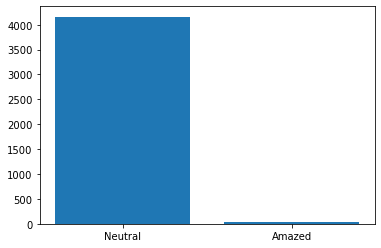

In [48]:
data = pd.read_csv('results.csv')

frame_nox = [i for i in range(data.shape[0])]
emotions = [i for i in data.iloc[:, 1]]

emotion_names = [i for i in data['class'].unique()]
frequency_all = [i for i in data['class'].value_counts()]

plt.bar(emotion_names, frequency_all)

### 2

In [ ]:
emotion_occurunce_frameno = []
for i in emotions:
    if i == 'Upset':
        emotion_occurunce_frameno.append(1)
    elif i == 'Annoyed':
        emotion_occurunce_frameno.append(2)
    elif i == 'Distress':
        emotion_occurunce_frameno.append(3)
    elif i == 'Satisfied':
        emotion_occurunce_frameno.append(4)
    elif i == 'Dissatisfied':
        emotion_occurunce_frameno.append(5)
    elif i == 'Neutral':
        emotion_occurunce_frameno.append(6)
    elif i == 'Amazed':
        emotion_occurunce_frameno.append(7)
        
    else:
        print(i)
plt.scatter(frame_nox, emotion_occurunce_frameno)
#plt.savefig('2.jpg')

### 3

increase in Neutral emotions between 0 and 100
increase in Neutral emotions between 100 and 200
increase in Neutral emotions between 200 and 300
increase in Neutral emotions between 300 and 400
increase in Neutral emotions between 400 and 500
increase in Neutral emotions between 500 and 600
increase in Neutral emotions between 600 and 700
increase in Neutral emotions between 700 and 800
increase in Neutral emotions between 800 and 900
increase in Neutral emotions between 900 and 1000
increase in Neutral emotions between 1000 and 1100
increase in Neutral emotions between 1100 and 1200
increase in Neutral emotions between 1200 and 1300
increase in Neutral emotions between 1300 and 1400
increase in Neutral emotions between 1400 and 1500
increase in Neutral emotions between 1500 and 1600
increase in Neutral emotions between 1600 and 1700
increase in Neutral emotions between 1700 and 1800
increase in Neutral emotions between 1800 and 1900
increase in Neutral emotions between 1900 and 2000
i

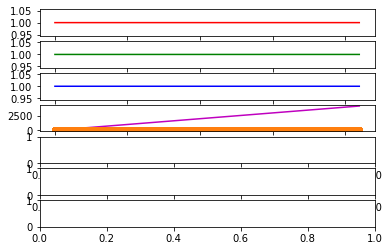

In [62]:
# amaze occurence at which frame, with cumulative plot
fig, axes = plt.subplots(7, 1)

upset_count = 1
annoyed_count = 1
distress_count = 1
satisfied_count = 1
dissatisfied_count = 1
neutral_count = 1
amazed_count = 1

c_upset = []
c_annoyed = []
c_distress = []
c_satisfied = []
c_dissatisfied = []
c_neutral = []
c_amazed = []

for i in emotions:
    if i == 'Upset':
        upset_count += 1
        c_upset.append(upset_count)
    else:
        c_upset.append(upset_count)

    if i == 'Annoyed':
        annoyed_count += 1
        c_annoyed.append(annoyed_count)
    else:
        c_annoyed.append(annoyed_count)

    if i == 'Distress':
        distress_count += 1
        c_distress.append(distress_count)
    else:
        c_distress.append(distress_count)

    if i == 'Satisfied':
        satisfied_count += 1
        c_satisfied.append(satisfied_count)
    else:
        c_satisfied.append(satisfied_count)
    
    if i == 'Dissatisfied':
        dissatisfied_count += 1
        c_dissatisfied.append(dissatisfied_count)
    else:
        c_dissatisfied.append(dissatisfied_count)
        
    if i == 'Amazed':
        amazed_count += 1
        c_amazed.append(dissatisfied_count)
    else:
        c_amazed.append(dissatisfied_count)
    
    if i == 'Neutral':
        neutral_count += 1
        c_neutral.append(neutral_count)
    else:
        c_neutral.append(neutral_count)

#change in emotions
l = 0
for k in range(100, frame_no, 100):
    change = (c_upset[k] - c_upset[l])/100
    if change >= 0.1:
        print('increase in Upset emotions between', l, 'and', k)
    l = k

l = 0
for k in range(100, frame_no, 100):
    change = (c_annoyed[k] - c_annoyed[l])/100
    if change >= 0.1:
        print('increase in Annoyed emotions between', l, 'and', k)
    l = k

l = 0
for k in range(100, frame_no, 100):
    change = (c_distress[k] - c_distress[l])/100
    if change >= 0.1:
        print('increase in Distress emotions between', l, 'and', k)
    l = k

l = 0
for k in range(100, frame_no, 100):
    change = (c_satisfied[k] - c_satisfied[l])/100
    if change >= 0.1:
        print('increase in Satisfied emotions between', l, 'and', k)
    l = k
    
########################################################################################3    
l = 0
for k in range(100, frame_no, 100):
    change = (c_dissatisfied[k] - c_dissatisfied[l])/100
    if change >= 0.1:
        print('increase in Dissatisfied emotions between', l, 'and', k)
    l = k

l = 0
for k in range(100, frame_no, 100):
    change = (c_neutral[k] - c_neutral[l])/100
    if change >= 0.1:
        print('increase in Neutral emotions between', l, 'and', k)
    l = k

# cumulative plot
#j = 0
#c_engaged = []
# for i in emotions:
#    if i == 'Engaged':
#        j += 1
#        c_engaged.append(j)
#    else:
#        c_engaged.append(j)

axes[0].plot(frame_nox, c_upset, 'r')
axes[1].plot(frame_nox, c_annoyed, 'g')
axes[2].plot(frame_nox, c_distress, 'b')
axes[3].plot(frame_nox, c_satisfied, 'y')
axes[3].plot(frame_nox, c_dissatisfied, 'p')
axes[3].plot(frame_nox, c_neutral, 'm')
axes[3].plot(frame_nox, c_amazed, 'o')

plt.savefig('3.jpg')

In [8]:
import csv
import numpy as np
import matplotlib.pyplot as plt

emotions_names = ['Upset', 'Annoyed', 'Distress', 'Satisfied', 'Dissatisfied', 'Amazed', 'Neutral']
emotions = []
with open('results.csv', 'r') as csv_file:
    csv_reader = csv.DictReader(csv_file)

    frame_no = 0
    frame_nox = []
    for line in csv_reader:
        frame_no += 1
        frame_nox.append(frame_no)
        emotions.append(line["class"])

# bar plot, plotting the frequency of each emotion
upset_frequency = emotions.count('Upset')
annoyed_frequency = emotions.count('Annoyed')
distress_frequency = emotions.count('Distress')
satisfied_frequency = emotions.count('Satisfied')
dissatisfied_frequency = emotions.count('Dissatisfied')
neutral_frequency = emotions.count('Neutral')
amazed_frequency = emotions.count('Amazed')


frequency_all = [upset_frequency, annoyed_frequency, distress_frequency, satisfied_frequency, dissatisfied_frequency, neutral_frequency, amazed_frequency]

#plt.bar(emotions_names, frequency_all)
#plt.savefig('1.jpg')